# Applied Statistics: Lab 4

## Notation interpretation

- $Norm(\mu, \sigma^2)$ denotes normal distribution with mean $\mu$ and variance $\sigma^2$, i.e. standard deviation $\sigma$
- $Norm$ may also be notated as $\text{Normal}$
- $t(k)$ denotes Student's t-distribution with $k$ degrees of freedom

## Necessary imports & definitions

In [ ]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, norm, kstest, t, cauchy

# Small helper function to add details to plots:
def _(title, xlabel, ylabel, legend=False):
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  if legend: plt.legend()
  plt.show()

## Question 1

/usr/local/lib/python3.10/dist-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


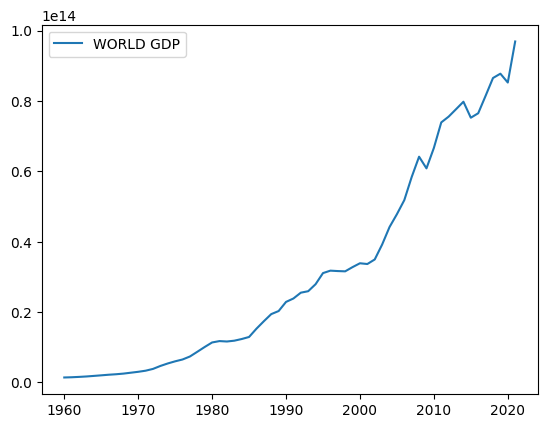

In [ ]:
gdp_data = wb.download(indicator="NY.GDP.MKTP.CD", country="WLD" ,start="1960", end="2021")
time = np.arange(1960 ,2022)
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()
# Data is returned in inverse chronological order, so reverse order:
gdp = np.flip(gdp)
# Plot world GDP data against time:
plt.plot(time, gdp, label="WORLD GDP")
plt.legend()
plt.show()

### Part 1a
If the growth rate was a constant $r$, then the world's GDP would grow as:

$GDP_k = GDP_0(1 + r)^k$ ... (1)

<br>Here, $k$ is the number of years since 1960 and $GDP_0$ is the world's GDP in 1960. This is clearly not a linear relationship between time ($k$, in years) and GDP. However, we can get a linear relationship by applying a simple transformation $f$ on both side of the equation. Seeing how the function (1) is exponential, we see that the transformation is the logarithm function, i.e. $f(x)=\log(x)$. For convenience, we shall take logarithm with base $e$, i.e. natural logarithm (since this is the default base for the `log` function in NumPy), although any base is suitable. Applying this to (1):

$\log(GDP_k)$

$= \log(GDP_0(1 + r)^k)$

$= \log(GDP_0) + \log((1 + r)^k)$

$= \log(GDP_0) + k\log(1 + r)$ ... (2)

---

The general form of linear regression is given by:

$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$

<br>Comparing this to (2), we can see that:

- $y_i = \log(GDP_k)$ ($y_i$ is the observed target value)
- $\beta_0 = \log(GDP_0)$
- $\beta_1 = \log(1 + r)$
- $x_i = k$
- $\epsilon_i$ is the $i$th random error term (can be $0$)

<br>Note that $\beta_1$ is unknown since $r$ is uknown; the whole of $\log(GDP_0(1 + r))$ will be estimated with linear regression. Furthermore, the linear regression process considers $\beta_0$ as an unknown as well, even though in our case we do know it. Hence, we estimate $y_i$ by:

$\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i$

<br>Here, we have that:

- $\hat{y_i} \approx \log(GDP_k)$
- $\hat{\beta_0} \approx \log(GDP_0)$
- $\hat{\beta_1} \approx \log(1 + r)$
- $x_i = k$

<br>The main takeaway is that for the following regression, the target is $\log(GDP_k)$ while the feature, i.e. the independent variable is $k$, i.e. `time-1960` ($k$ is the number of years since 1960, so at the year 1960, $k=0$). Through linear regression, however, we will probably not obtain the true value of these parameters, including $\log(GDP_0)$.
<br><br>**NOTE**: We can still plot the results with respect to the values of `time`, since they correspond to the associated values of $k$.

### Part 1b

In [ ]:
# Obtaining y (observed y-values):
log_gdp = np.log(gdp)
# Obtaining time as years since 1960:
k = time - 1960
# Performing regression against k, i.e. time-1960:
LR = linregress(k, log_gdp)

# Printing the results:
labels = ["slope", "intercept", "r-value", "p-value"]
for l, lr in list(zip(labels, LR[:4])): print(f"{l} = {lr}")

slope = 0.07156635288409491
intercept = 28.255546864116795
r-value = 0.9826894064474252
p-value = 1.2172770550365105e-45


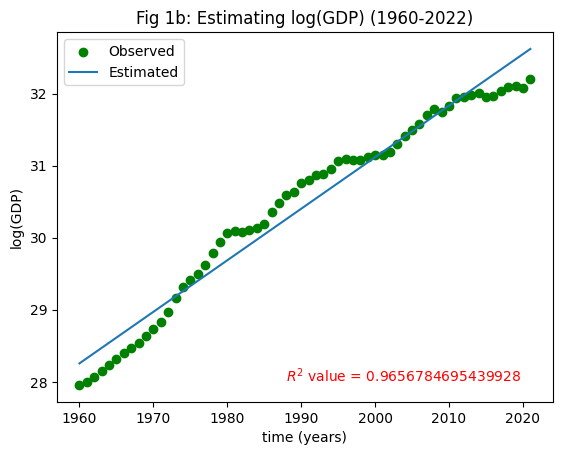


REMARKS FOR CLARIFICATION:
R^2 value (coefficient of determination) is 0.9656784695439928


In [ ]:
plt.scatter(time, log_gdp, color="green", label="Observed")
plt.plot(time, LR.intercept + LR.slope*k, label="Estimated")
plt.annotate(f"$R^2$ value = {LR.rvalue**2}", (1988, 28), color="red")
_("Fig 1b: Estimating log(GDP) (1960-2022)", "time (years)", "log(GDP)", True)

print("\nREMARKS FOR CLARIFICATION:")
print("R^2 value (coefficient of determination) is", LR.rvalue**2)

### Part 1c

In [ ]:
residuals = log_gdp - (LR.intercept + LR.slope*k)
print("STATISTICS FOR RESIDUALS")
print("Arithmetic mean =", np.mean(residuals))
print("Standard deviation =", np.std(residuals))

STATISTICS FOR RESIDUALS
Arithmetic mean = 1.5471495052840891e-15
Standard deviation = 0.241446271483211


**NOTE**: `1.5471495052840891e-15` $=1.5471495052840891 \times 10^{-15}$

In [ ]:
sigma = np.std(residuals)
dist = norm(0, sigma)
KS = kstest(residuals, dist.cdf, alternative="two-sided", N=len(residuals))

# Printing the results:
labels = ["statistic", "pvalue"]
for l, ks in list(zip(labels, KS[:2])): print(f"{l} = {ks}")

statistic = 0.1305396466329199
pvalue = 0.22115691558082118


**REMARKS**:<br>
The Kolmogorov-Smirnov (KS) test is one that tests the null hypothesis that a sample of a certain size was drawn from a particular theoretical distribution. In our case, the sample is the collection of residuals, whereas the theoretical distribution is the normal distribution with mean $0$ and standard deviation $\hat{\sigma}$, i.e. $Norm(0, \hat{\sigma}^2)$ (with $\hat{\sigma}$ being the sample standard deviation of the residuals).
<br><br>Performing the KS test for the sample of residuals, we obtain a p-value of around $0.221$. Taking the significance level $1-\alpha = 0.01$ (where $\alpha=0.99=99\%$ is the confidence level), we observe that $0.221 > 1-\alpha$, which means we fail to reject the null hypothesis that the sample of residuals is drawn from $Norm(0, \hat{\sigma}^2)$. In other words, the observed KS test statistic $0.1305$ calculated for the sample of residuals is not extreme enough to be considered implausible, under the assumption that the null hypothesis is true.

### Part 1d
We had obtained the transformed model for estimating $GDP_k$ as:

$\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i$

<br>Here, we have that:

- $\hat{y_i} \approx \log(GDP_k)$
- $\hat{\beta_0} \approx \log(GDP_0)$
- $\hat{\beta_1} \approx \log(1 + r)$
- $x_i = k$

<br>**Applying the inverse transformation**...
<br>To obtain the linear model, we have applied logarithm (base $e$, i.e. natural logarithm) to the equation:<br>$GDP_k = GDP_0(1 + r)^k$
<br><br>Hence, we had obtained:<br>$\log(GDP_k) = \log(GDP_0) + k\log(1 + r) = \log(GDP_0) + \log(1 + r)^k$
<br><br>Remember that the logarithm is with base $e$. Applying the inverse transformation:<br>$e^{\log(GDP_k)} = GDP_k = e^{\log(GDP_0) + \log(1 + r)^k}$<br>$= e^{\log(GDP_0)} e^{\log(1 + r)^k}$<br>$= e^{\log(GDP_0)} (e^{\log(1 + r)})^k$
<br><br>We had previously obtained the estimates:

- $\log(GDP_0) \approx \hat{\beta_0}$ (regression intercept)
- $\log(1 + r) \approx \hat{\beta_1}$ (regression slope)

<br>Hence, we have that:
<br>$GDP_k \approx e^{\hat{\beta_0}} (e^{\hat{\beta_1}})^k$

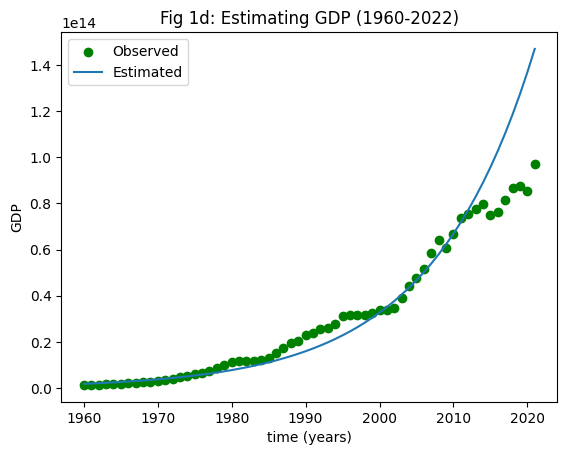

In [ ]:
# Obtaining the model results from inverse transformation:
gdp_estimated = np.exp(LR.intercept)*np.exp(LR.slope)**k

# Plotting the inverse-transformed model along with the original GDP values:
plt.scatter(time, gdp, color="green", label="Observed")
plt.plot(time, gdp_estimated, label="Estimated")
_("Fig 1d: Estimating GDP (1960-2022)", "time (years)", "GDP", True)

### Part 1e
**Relationship between the long-term growth rate** $r$ **& slope of the regression** $\hat{\beta_1}$ **for world GDP**...
<br>Previously, we had defined that:

$\beta_1 = log(1+r)$

$\implies e^{\beta_1} = 1+r$

$\implies r = e^{\beta_1} - 1$

---

Given that we have only obtained $\hat{\beta_1} \approx \beta_1$, we obtain that:

$r \approx e^{\hat{\beta_1}} - 1$

In [ ]:
r_estimated = np.exp(LR.slope) - 1
print(f"\nEstimated long term growth rate of GDP: {r_estimated*100:.3f}%\n")


Estimated long term growth rate of GDP: 7.419%



### Part 1f
After 2015 (in **Fig 1d**), we observe that the estimated GDP diverges from the observed GDP significantly, whereas in the previous years, the estimated and observed GDP were largely aligned. This indicates that GDP growth is only exponential upto a certain point, after which it tends to plateau or stabilise. This implies that the exponential model is not the most appropriate model to model GDP in general, and a model that accounts for the asymptotic limits of GDP growth (ex. logistic model) may be better suited to model GDP in the long-run.

## Question 2
**IMPORTANT NOTE ON INTERPRETATION OF THE QUESTION**:<br>The distribution of error terms given in the question, i.e. $\text{Normal}(0,\frac{1}{5})$, is interpreted as normal distribution with mean $0$ and variance $\frac{1}{5}$. This interpretation is in accordance with the common format of this notation; it is also the format used in the lectures and the accompanying slides. Hence, the standard deviation of error terms is given by $\sigma = \sqrt{\frac{1}{5}}$.

### Part 2a
In this case, we are essentially simulating the target observations (i.e. values of a linearly dependent variable $y$ to the variable $x$) by using random error terms generated according to the given distribution $Norm(0, \frac{1}{5})$. In this case, we know the "true" values of the slope and intercept of the linear regression ($a$ and $b$ respectively), as well as the true variance of the error terms. The purpose of such a simulation is to demonstrate the relationship between estimates of the linear regression and their theoretical distributions.

In [ ]:
# Global variables:
a, b, n, N, sigma = 1/2, 2, 200, 10000, 1/5
"""
a ==> true value of the intercept
b ==> true value of the slope
n ==> sample size per regression
N ==> number of samples of size `n` to generate
sigma ==> standard deviation of error terms
"""
#------------------------------------
# Function for generating y_i's according to given x_i's & e_i's:
def generate_y(x, e, a=a, b=b): # We have default a & b values
  return a*x + b + e
#------------------------------------
# Generating x_i's (independent variable values):
x = np.linspace(-5, 5, n).reshape(1, n)
mu_x = np.mean(x) # For future use
# NOTE 1: Reshaping it so makes it easier to repeat along axis 0
# NOTE 2: We will duplicate this vector 10000 times for future purposes
#------------------------------------
# Generating e_i's (error term values):
e = norm.rvs(loc=0, scale=sigma, size=(N, n))
"""
CLARIFICATION OF ARGUMENTS:
For `scipy.stats.norm.rvs`:
loc   ==> mean
scale ==> standard deviation
size  ==> number of samples to generate
"""
#------------------------------------
# Generating y_i's:
y = generate_y(np.repeat(x, N, axis=0), e)

Performing 10000 linear regressions...

In [ ]:
result = []
for i in range(y.shape[0]): result.append(linregress(x, y[i]))
result = np.array(result)

# Picking our the slopes & intercepts alone:
slopeList = result[:,0]
interceptList = result[:,1]

Note that the results of `linregress` are given as (in order):<br>`slope, intercept, rvalue, pvalue, stderr, intercept_stderr`

### Part 2b

#### Theoretical densities of slope & intercept

We shall consider linear regression in the framework wherein:

- The error terms $e_1, e_2 ... e_n$ are independent random variables distributed by $Norm(0, \sigma^2)$
- The target $y_i$ for the $i$th observation is generated using given constants & $e_i$

In this framework, each $y_i$ is also an independent, normally distributed random variable. By extension, since the slope & intercept estimates are based on observed target values, i.e. generated $y_i$ values, the slope & intercept estimators are also independent, normally distributed random variables.
<br><br>We shall notate the slope and intercept estimators as $\hat{\beta_1}$ and $\hat{\beta_0}$ respectively, given that the true slope and intercept values (using which the $y_i$'s were generated) are $\beta_1$ and $\beta_2$ respectively. Using ordinary least squares estimation, we get the following unbiased estimators:

- $\hat{\beta_1}=\frac{\sum_{i=1}^{n}(y_i-\bar{y})(x_i-\bar{x})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$
- $\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}$

**REMINDER**: $n$ _is the sample size, i.e. the range of_ $i$.
<br><br>Given that the above are unbiased esimators, their true means have to be $\beta_1$ and $\beta_0$ respectively. Furthermore, using the above formulations, we can derive the variance of each, thereby obtaining the following distributions for each:

- $\hat{\beta_1} \sim Norm(\beta_1, \frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2})$
- $\hat{\beta_0} \sim Norm(\beta_0, \frac{\sigma^2 \sum_{i=1}^{n}{x_i}^2}{n\sum_{i=1}^{n}(x_i-\bar{x})^2})$

**REMINDER**: $\sigma^2$ _is the variance of the error terms._

#### Plotting the theoretical & actual density distributions of the slope & intercept estimates

Convenience code...

In [ ]:
# Storing frequently re-used summations:
SUM = {"(x-mu_x)^2":np.sum((x-mu_x)**2), "x^2":np.sum(x**2)}

**IMPLEMENTATION NOTE**: **Why not use** `sum` **instead of** `np.sum`:<br>The in-built Python function `sum` adds up the elements of a 1D collection (list, set, array, etc.). Now, note that by reshaping `x=np.linspace(-5, 5, 200)` using `.reshape(1, 200)`, we have essentially made it into a 1D collection with a single element, that single element being a row vector of size 200. Hence, the reshaped `x` or any function of the reshaped `x` that does not alter the shape would also result in a 1D array with a single elment, that single element being a row vector of size 200. Hence, applying `sum` on `x` or a function of `x` (ex. `x**2`) would be essentially an identity function, i.e. the sum would not occur, since the `sum` function interprets the input as a singleton collection. On the other hand, `np.sum` by default obtains the sum of the flattened version of any array inputted to it, which is what we seek.

Plotting theoretical distributions against observed distributions...

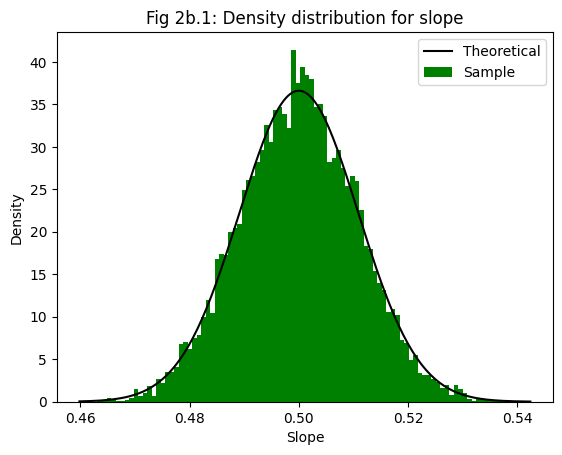

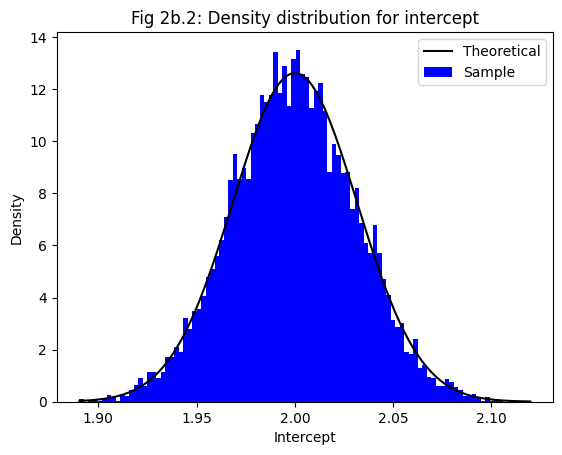

In [ ]:
# For slope...
_x = np.linspace(min(slopeList), max(slopeList), n)
s = np.sqrt(sigma**2/SUM["x^2"])
plt.plot(_x, norm.pdf(_x, loc=a, scale=s), color="black", label="Theoretical")
plt.hist(slopeList, bins=100, density=True, color="green", label="Sample")
_("Fig 2b.1: Density distribution for slope", "Slope", "Density", True)

# For intercept...
_x = np.linspace(min(interceptList), max(interceptList), 200)
s = np.sqrt(sigma**2*SUM["x^2"]/(n*SUM["(x-mu_x)^2"]))
plt.plot(_x, norm.pdf(_x, loc=b, scale=s), color="black", label="Theoretical")
plt.hist(interceptList, bins=100, density=True, color="blue", label="Sample")
_("Fig 2b.2: Density distribution for intercept", "Intercept", "Density", True)

**IMPLEMENTATION NOTE**: `density=True` in `matplotlib.pyplot.hist`<br>Putting the option `density=True` obtains and groups (into bins) the sample density of each value of a variable, such that the area under the histogram integrates (or adds up to) to $1$. The sample density is given by:<br>$f(x) = \frac{c(x)}{b\sum_{x' \in X} c(x')}$

- $X$ is the set of all possible values of a variable
- $f(x)$ is the sample density of value $x \in X$
- $c(x)$ is the frequency of $x$ in the sample
- $\sum_{x' \in X}c(x')$ is the total frequency (i.e. sample size)
- $b$ is the bin width, i.e. the range of values covered by each bin

**NOTES**:

- $b = \frac{\sum_{x' \in X}c(x')}{n}$ where $n$ is the number of bins
- Sample density of $x$ is the estimated probability density of $x$

---

**OBSERVATIONS**:<br>We observe that the sample density distribution for each parameter (slope and intercept) corresponds closely in mean, scale and shape to the theoretical density distribution for the given parameter. A key point to reiterate is that since the error terms are random variables, and since the target value $y$ is generated using the error terms and hence is also random, the slope and intercept estimators (which are formulated using $y$) are also random variables that are normally distributed based on the distribution of the error terms. What we observe in the above graph is that the actual estimates of the slope and intercept are distributed according to the expected (i.e. theoretical) distributions of the respective estimators.<br><br>This is an expected result, given that the values for the standard deviation of normally distributed random errors $\sigma$, observations $x$ as well as the true values of the slope and intercept $a$ and $b$ are all known, and were used to generate the target variable values (i.e. $y$). The law of large numbers implies that for large enough random samples from a certain theoretical distribution from which the estimates of the slope and intercept are indirectly drawn (based on their formulation and dependence on randomly drawn samples of error terms), the sample distribution will tend toward the true values of the theoretical distribution's parameters, and this is reflected in the above graphs.

### Part 2c

#### Obtaining the test statistic for slope & intercept estimates

We have that the slope and intercept estimators are random variables distributed by:

- $\hat{\beta_1} \sim Norm(\beta_1, \frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2})$
- $\hat{\beta_0} \sim Norm(\beta_0, \frac{\sigma^2 \sum_{i=1}^{n}{x_i}^2}{n\sum_{i=1}^{n}(x_i-\bar{x})^2})$

Now, considering the case where $\sigma^2$, i.e. the variance of the error terms, is unknown, the above distributions cannot be obtained, hence preventing us from using the z-test to test the confidence we have for a certain estimate of the slope of intercept. Hence, we must use a test statistic that is independent of $\sigma^2$. To derive this statistic, consider the following facts...
<br><br>**FACT 1**:<br>We can standarise the estimators to get:

- $\frac{\hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}}} \sim Norm(0, 1)$
- $\frac{\hat{\beta_0}-\beta_0}{\sqrt{\frac{\sigma^2 \sum_{i=1}^{n}{x_i}^2}{n\sum_{i=1}^{n}(x_i-\bar{x})^2}}} \sim Norm(0, 1)$

<br>**FACT 2**:<br>There is a theorem that states:<br>$\frac{\sum_{i=1}^n (y_i-\beta_0-\beta_1 x_i)}{\sigma^2} \sim \chi^2(n-2)$
<br><br>**FACT 3**:<br>The Student's t-distribution with $k$ degrees of freedom is:<br>$t(k)=\frac{Norm(0, 1)}{\sqrt{\frac{\chi^2(k)}{k}}}$
<br><br>_Using the above facts, we can derive the following t-test statistics_...

---

**_For slope estimator_**...

**NOTES**:

- We assume that $\beta_0$ (i.e. the true value of the intercept) is known
- $\beta_1$ here is the assumed slope value to be tested

$\frac{\frac{\hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}}}}{\sqrt{\frac{\frac{\sum_{i=1}^n (y_i-\beta_0-\beta_1 x_i)}{\sigma^2}}{n-2}}} \sim \frac{Norm(0, 1)}{\sqrt{\frac{\chi^2(n-2)}{n-2}}} = t(n-2)$

But, we can simplify the left-hand side as follows...

$\frac{\frac{\hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}}}}{\sqrt{\frac{\frac{\sum_{i=1}^n (y_i-\beta_0-\beta_1 x_i)}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\sqrt{\frac{\sum_{i=1}^n (y_i-\beta_0-\beta_1 x_i)}{(n-2)\sum_{i=1}^{n}(x_i-\bar{x})^2}}}$

Hence, we have that...

$\frac{\hat{\beta_1}-\beta_1}{\sqrt{\frac{\sum_{i=1}^n (y_i-\beta_0-\beta_1 x_i)}{(n-2)\sum_{i=1}^{n}(x_i-\bar{x})^2}}} \sim t(n-2)$

Using this test statistic, we can test whether the assumed value of the true slope, i.e. $\beta_1$ can be rejected as the true slope value, given the estimated slope value $\hat{\beta_1}$ and the observations; i.e. we can test whether the assumed value of $\beta_1$ is too extreme to be considered plausible with respect to a certain confidence level, given the data.

---

**_For intercept estimator_**...

**NOTES**:

- We assume that $\beta_1$ (i.e. the true value of the slope) is known
- $\beta_0$ here is the assumed intercept value to be tested

$\frac{\frac{\hat{\beta_0}-\beta_0}{\sqrt{\frac{\sigma^2 \sum_{i=1}^{n}{x_i}^2}{n\sum_{i=1}^{n}(x_i-\bar{x})^2}}}}{\sqrt{\frac{\frac{\sum_{i=1}^n (y_i-\beta_0-\beta_1 x_i)}{\sigma^2}}{n-2}}} \sim \frac{Norm(0, 1)}{\sqrt{\frac{\chi^2(n-2)}{n-2}}} = t(n-2)$

But, we can simplify the left-hand side as follows...

$\frac{\frac{\hat{\beta_0}-\beta_0}{\sqrt{\frac{\sigma^2 \sum_{i=1}^{n}{x_i}^2}{n\sum_{i=1}^{n}(x_i-\bar{x})^2}}}}{\sqrt{\frac{\frac{\sum_{i=1}^n (y_i-\beta_0-\beta_1 x_i)}{\sigma^2}}{n-2}}} = \frac{(\hat{\beta_0}-\beta_0)\sqrt{(n(n-2)\sum_{i=1}^{n}(x_i-\bar{x})^2)}}{\sqrt{\sum_{i=1}^n (y_i-\beta_0-\beta_1 x_i) \sum_{i=1}^{n}{x_i}^2}}$

Hence, we have that...

$\frac{(\hat{\beta_0}-\beta_0)\sqrt{(n(n-2)\sum_{i=1}^{n}(x_i-\bar{x})^2)}}{\sqrt{\sum_{i=1}^n (y_i-\beta_0-\beta_1 x_i) \sum_{i=1}^{n}{x_i}^2}} \sim t(n-2)$

Using this test statistic, we can test whether the assumed value of the true intercept, i.e. $\beta_0$ can be rejected as the true slope value, given the estimated slope value $\hat{\beta_0}$ and the observations; i.e. we can test whether the assumed value of $\beta_0$ is too extreme to be considered plausible with respect to a certain confidence level, given the data.

---

**IMPLEMENTATION NOTE**: In the current implementation, we have $\beta_0=b$ and $\beta_1=a$.


#### Plotting densities of calculated test statistics along with the theoretical densities
Obtaining the test statistics for each of the 10000 linear regression results...

In [ ]:
# Initialising storage for test statistics:
T = {"a":[], "b":[]}
# NOTE: a ==> slope, b ==> intercept

# Obtaining test statistics for slope:
_a = 1/2 # Slope value to test
_b = 2 # Assumed value for intercept
for i in range(y.shape[0]):
  p = slopeList[i]-_a
  q = np.sqrt(np.sum((y[i]-_b-_a*x)**2)/((n-2)*SUM["(x-mu_x)^2"]))
  T["a"].append(p/q)

# Obtaining test statistics for intercept:
_a = 1/2 # Assumed value for slope
_b = 2 # Intercept value to test
for i in range(y.shape[0]):
  p = (interceptList[i]-_b)*np.sqrt(n*(n-2)*SUM["(x-mu_x)^2"])
  q = np.sqrt(np.sum((y[i]-_b-_a*x)**2)*SUM["x^2"])
  T["b"].append(p/q)

Plotting the densities...

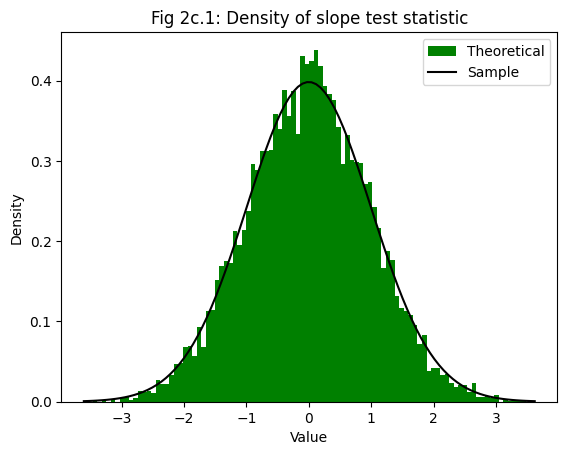

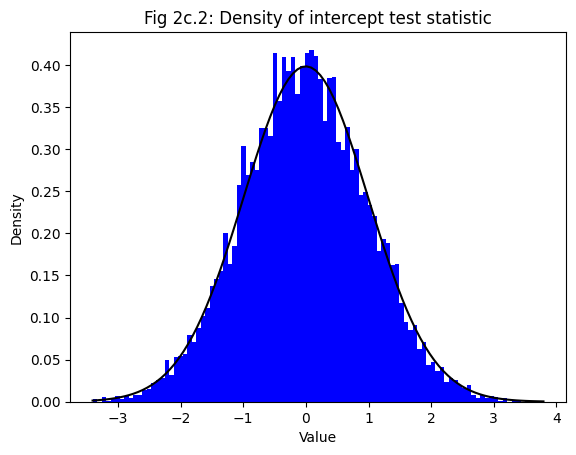

In [ ]:
# For slope test statistic...
_x = np.linspace(min(T["a"]), max(T["a"]), 100)
plt.hist(T["a"], bins=100, density=True, color="green", label="Theoretical")
plt.plot(_x, t.pdf(_x, df=n-2), color="black", label="Sample")
_("Fig 2c.1: Density of slope test statistic", "Value", "Density", True)

# For intercept test statistic...
_x = np.linspace(min(T["b"]), max(T["b"]), 100)
plt.hist(T["b"], bins=100, density=True, color="blue", label="Theoretical")
plt.plot(_x, t.pdf(_x, df=n-2), color="black", label="Sample")
_("Fig 2c.2: Density of intercept test statistic", "Value", "Density")

**OBSERVATIONS**:<br>We observe that the sample densities of the calculated set of 10000 values for each test statistic (for slope and intercept) are distributed roughly according to $t(n-2)$ (i.e. Student's t-distribution with $n-2$ degrees of freedom). This indicates that the test statistics were correctly calculated, since the sample distributions closely follow the expected theoretical distribution.

### Part 2d
In null-hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. Hence, it is the probability mass of all values at least as extreme that a given value, i.e. as far or further from the mean than the given value. The nature of the distribution determines whether you must account for more extreme values on either side of the mean (two-sided or two-tailed test) or only one side of the mean (one-sided or one-tailed test, which could be left-tailed or right-tailed).
<br><br>In our case, given that Student's t-distribution is a symmetric distribution wherein randomly drawn values could fall with equal probability on either side of the mean, two-sided test is more appropriate. Given a random variable $X \sim t(k)$ (i.e. Student's t-distribution with $k$ degrees of freedom), and given a test statistic $c$ that is assumed to be distributed by $t(k)$, the probability of getting a value at least as extreme as $c$ (considering the two-sided test) is given by:
<br>$P(|X|\geq |c|)$
<br>$= 2\min(P(X \leq c), P(X \geq c))$
<br>$= 2\min(P(X \leq c), 1-P(X \leq c))$
<br>$= 2\min(F(c), 1-F(c))$ ($F$ being the cumulative distribution function (CDF) of $t(k))$

> REFERENCE: https://en.wikipedia.org/wiki/P-value

<br>In our case, we have the following null hypotheses:

- $a = \frac{1}{2}$, given $b = 2$ ... (1)
- $b = 2$, given $a = \frac{1}{2}$ ... (2)

<br>We also hold the assumption that the test statistics calculated follow the distribution $t(n-2)$ (i.e. Student's t-distribution with $n-2$ degrees of freedom, $n$ being sample size per linear regression), making them amenable to t-test. The test statistics (calculated for each of the 10000 linear regressions) stored in `T["a"]` are calculated under the assumption that null hypothesis (1) is true, whereas the test statistics (calculated for each of the 10000 linear regressions) stored in `T["b"]` are calculated under the assumption that null hypothesis (2) is true. We shall be focusing only on the final linear regression performed, hence considering only the test statistics `T["a"][-1]` and `T["b][-1]` for testing null hypotheses (1) and (2) respectively.

In [ ]:
# PERFORMING 2-SIDED T-TEST
#------------------------------------
# p-value for slope test statistic...
# NOTE: Assuming intercept = 2 and testing for slope = 1/2
CDF = t.cdf(T["a"][-1], df=n-2)
p_slope = 2*min(CDF, 1-CDF)
#------------------------------------
# p-value for slope test statistic...
# NOTE: Assuming slope = 1/2 and testing for intercept = 2
CDF = t.cdf(T["b"][-1], df=n-2)
p_intercept = 2*min(CDF, 1-CDF)
#------------------------------------
# Printing the results:
print("p-value (slope) =", p_slope)
print("p-value (intercept) =", p_intercept)

p-value (slope) = 0.6195409061383355
p-value (intercept) = 0.4585123933641233


**REMARKS**:<br>
In the above hypothesis testing, we test the null hypotheses:

- $a = \frac{1}{2}$, given $b = 2$ ... (1) (testing slope value, assuming intercept value)
- $b = 2$, given $a = \frac{1}{2}$ ... (2) (testing intercept value, assuming slope value)

<br>As explained above, given that Student's t-distribution is a symmetric distribution wherein randomly drawn values could fall with equal probability on either side of the mean, two-sided test is more appropriate. The confidence level taken is $\alpha=0.99=99\%$, with the significance level thereby being $1-\alpha=0.01$. Now, since the samples from which the above test statistics were obtained are randomly generated, the exact values may differ. But in general, the p-value for the slope test statistic as well as the intercept test statistic exceed the significance level $0.01$, meaning that we fail to reject both the null hypotheses (1) and (2). In other words, the values being tested for the slope $a$ and the intercept $b$ are plausible with respect to the sample values we have obtained. This is expected, since the values being tested and assumed for the slope and intercept are the true values from which the target values (i.e. $y$ values) were randomly generated.

### Part 2e

In [ ]:
# NOTE: Only the error terms have to be changed
#------------------------------------
# Generating e_i's (error term values):
e = cauchy.rvs(loc=0, scale=1/5, size=(N, n))
#------------------------------------
# Generating y_i's:
y = generate_y(np.repeat(x, N, axis=0), e)

Performing linear regression 10000 times...

In [ ]:
resultList = []
for i in range(y.shape[0]): resultList.append(linregress(x, y[i]))
resultList = np.array(resultList)

Note that the results of `linregress` are given as (in order):<br>`slope, intercept, rvalue, pvalue, stderr, intercept_stderr`
<br><br>We shall only consider the values of `slope`, `intercept` and `rvalue**2` (note that `rvalue` is the Pearson correlation coefficient; the square of rvalue is equal to the coefficient of determination $R^2$), since these are the values relevant in understanding the way the results of the linear regression are distributed and how the accuracy changes across iterations.

In [ ]:
# Squaring the `rvalue` column to get the coefficient of determination:
resultList[:, 2] = resultList[:, 2]**2

Plotting the above obtained results...


GRAPHS WITHOUT LIMITED HORIZONTAL AXIS:



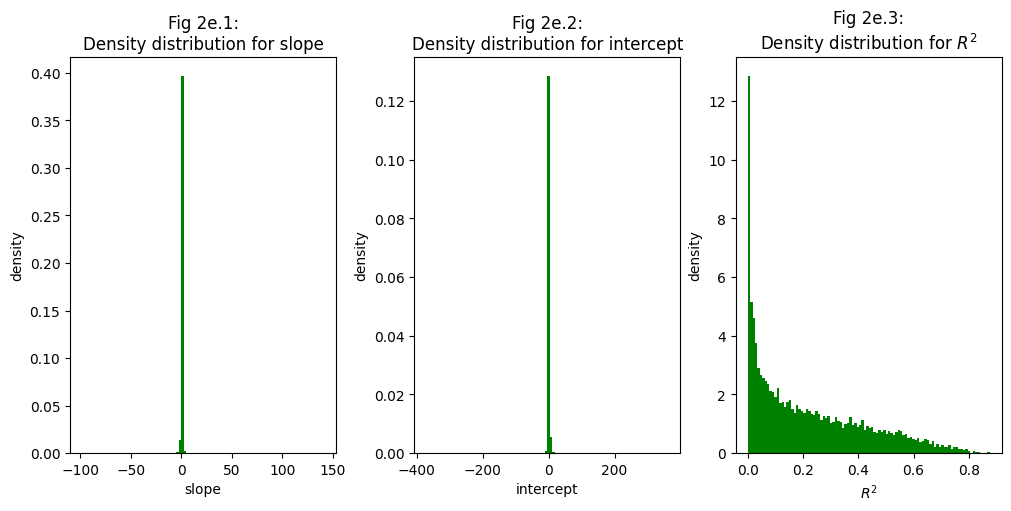


GRAPHS WITH LIMITED HORIZONTAL AXIS:



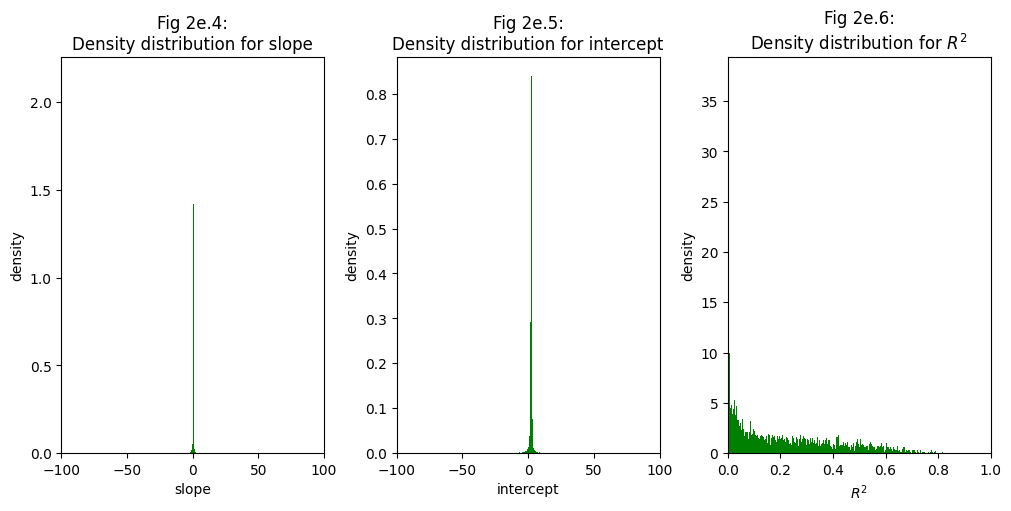

In [ ]:
# Plotting the statistics:
def plotStatistics(bins=100, xlims=None, k=0):
  # xlims: The set of intervals for the horizontal axis' bounds
  # k: The offset value to adjust the numbering of the plots

  labels = ["slope","intercept","$R^2$"]
  fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(10, 5))
  for i, l in enumerate(labels):
    axs[i].hist(resultList[:, i], bins=bins, density=True, color="green")
    if xlims != None: axs[i].set_xlim(xlims[i])
    axs[i].set_title(f"Fig 2e.{i+k+1}:\nDensity distribution for {l}")
    axs[i].set_xlabel(f"{l}")
    axs[i].set_ylabel("density")
  plt.show()

xlims = [[-100, 100], [-100, 100], [0, 1]]
print("\nGRAPHS WITHOUT LIMITED HORIZONTAL AXIS:\n")
plotStatistics(bins=100)
print("\nGRAPHS WITH LIMITED HORIZONTAL AXIS:\n")
plotStatistics(bins=1000, xlims=xlims, k = 3)

**OBSERVATIONS**:<br>_We have plotted two sets of graphs, one to see the whole range of values and the other to zoom into the areas with a larger concentration of points._
<br><br>The Cauchy distribution, like the normal distribution, belongs to the class of stable distributions, meaning that the sum of independent Cauchy distributions or a linear transformation of a Cauchy distribution results in another Cauchy distribution. Hence, the estimated regression slope and intercept are also distributed according to Cauchy distributions. This fact is hard to observe in the above graphs of sample distributions, since the sample size is very large (10000) but is concentrated around a small range (around -25 to 25); with larger amounts of bins in the histogram, it would be easier to observe this distribution, but that is very computationally intensive.

> REFERENCES:
> - https://encyclopediaofmath.org/wiki/Cauchy_distribution
> - https://en.wikipedia.org/wiki/Cauchy_distribution

<br>In the first set of graphs, we observe that the slope and intercept values have a very large range of values (ranging from two-three orders of magnitude away from zero), although they tend to be concentrated around a much smaller range (around -25 to 25). The $R^2$ values tend to be poor, with most of them falling below $0.4$, and the peak of the graph of $R^2$ being around $0$. This indicates a very poor accuracy in general of linear regression with the given values for slope and intercept, when error terms are distributed according to the Cauchy distribution.